## 1. Import Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [3]:
# Import Data
df_scaled = pd.read_csv('/Users/samabrams/Data Analysis Projects/ClimateWins ML Project/02 Data/Prepared Data/weather_scaled.csv')

df_answers = pd.read_csv('/Users/samabrams/Data Analysis Projects/ClimateWins ML Project/02 Data/Original Data/Answers-Weather_Prediction_Pleasant_Weather.csv')

## 2. Prepare Data

In [5]:
df_belgrade = df_scaled[['BELGRADE_temp_mean']].copy()

In [6]:
print(df_belgrade.shape)
print(df_answers.shape)

(22950, 1)
(22950, 16)


In [7]:
df_pleasant = df_answers[['BELGRADE_pleasant_weather']].copy()

In [8]:
df_pleasant

,BELGRADE_pleasant_weather
0,0
1,0
2,0
3,0
4,0
...,...
22945,0
22946,0
22947,0
22948,0


In [9]:
# Create a matrix

X = df_belgrade
y = df_pleasant

In [10]:
#Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 1)
(5738, 1)
(17212, 1)
(5738, 1)


In [26]:
y_train = y_train.values.flatten()
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=2000, tol=0.0001)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=2000)

In [28]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.8084475947013712
0.8039386545834786


NameError: name 'labels' is not defined

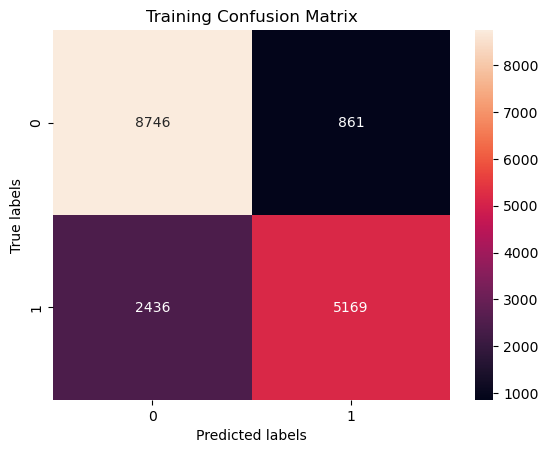

In [30]:
ax= plt.subplot()

#Confusion matrix for training data
cm = confusion_matrix(y_pred, y_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Training Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [32]:
mlp = MLPClassifier(
    hidden_layer_sizes=(200, 100, 50),
    max_iter=5000,
    tol=0.00001,
    learning_rate_init=0.001,
    random_state=42
)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(200, 100, 50), max_iter=5000, random_state=42,
              tol=1e-05)

In [34]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.808099000697188
0.8039386545834786


NameError: name 'labels' is not defined

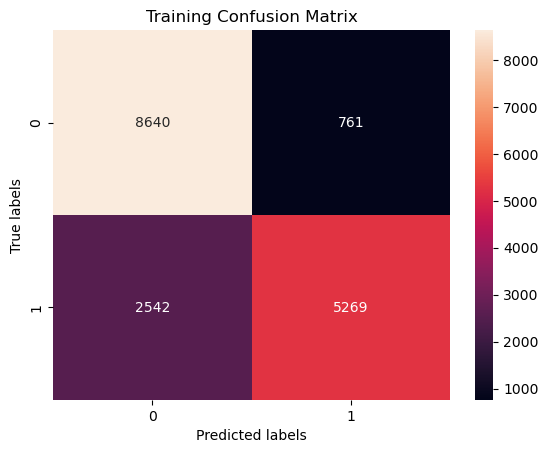

In [36]:
ax= plt.subplot()

#Confusion matrix for training data
cm = confusion_matrix(y_pred, y_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Training Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [38]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.808099000697188
0.8039386545834786
